<a href="https://colab.research.google.com/github/sakshamkumarsingh11/Dog-vision/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "/content/drive/MyDrive/Dog-vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog-vision"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.19.0
TF Hub version: 0.16.1
GPU not available :(


In [ ]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

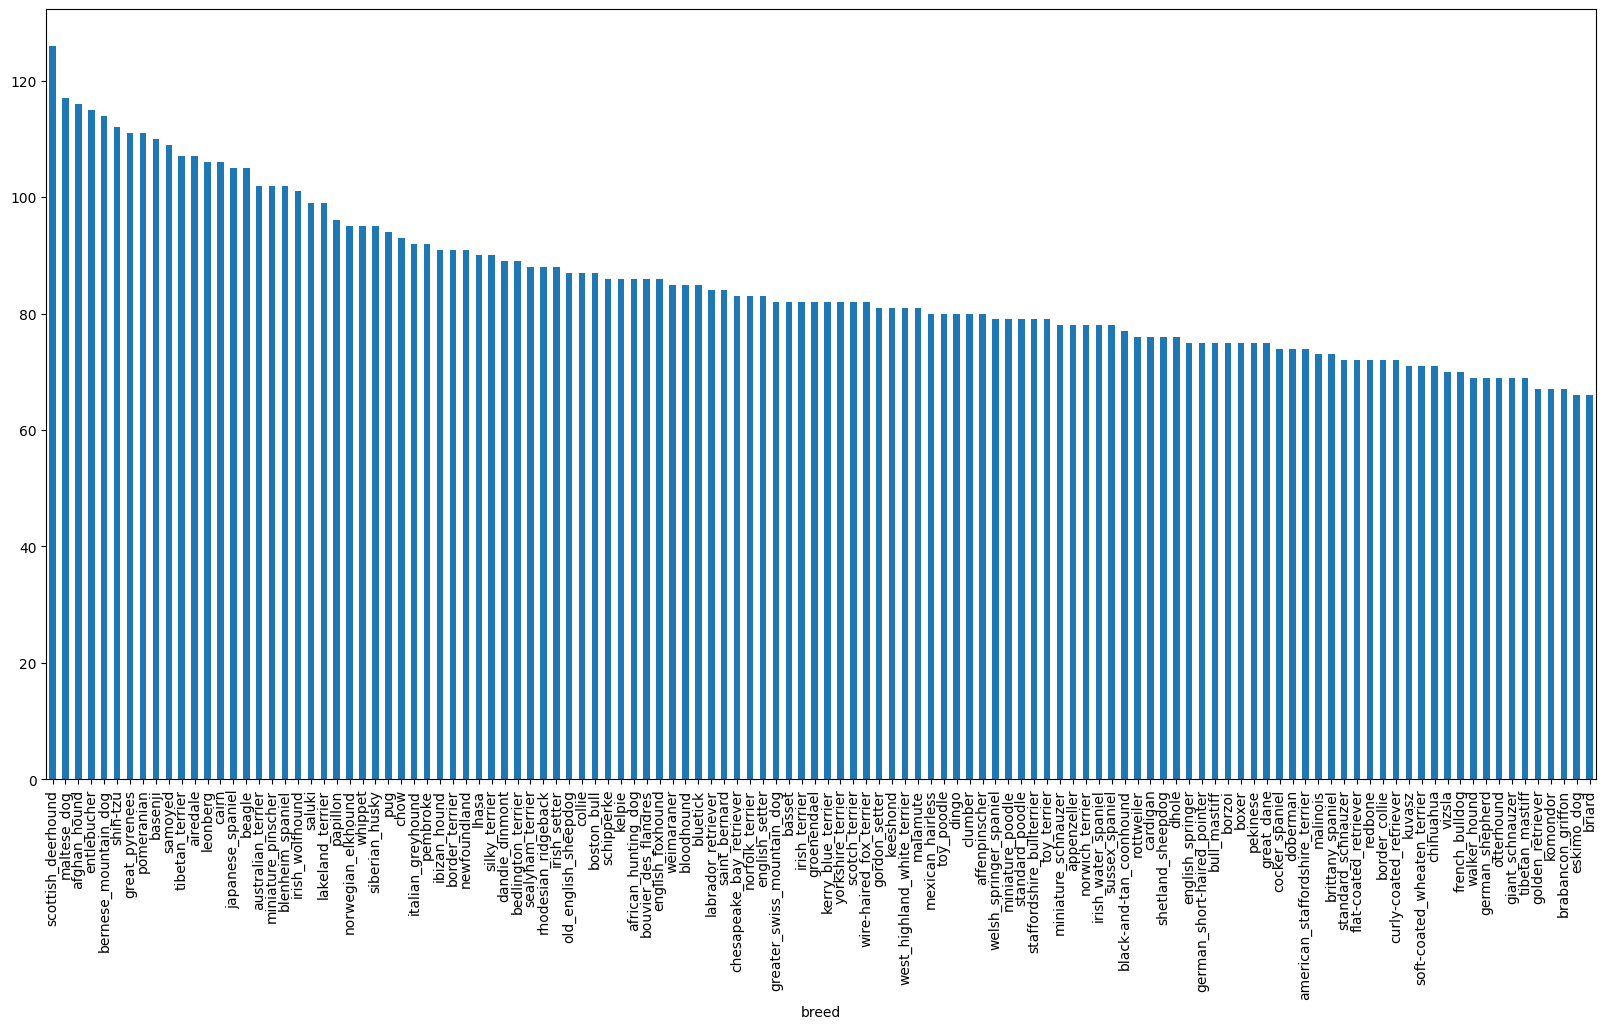

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

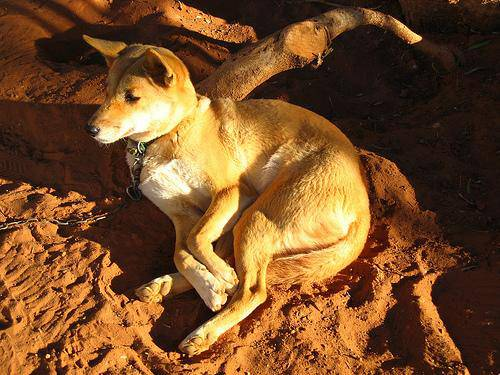

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames = ["drive/MyDrive/Dog-vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("drive/MyDrive/Dog-vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [ ]:
labels_csv["breed"][9000]


'tibetan_mastiff'

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(labels)

10222

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own  validation set

In [ ]:
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
#set number of images for experimentation
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
X_train[:5], y_train[:2]

(['drive/MyDrive/Dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing images - turning images into tensors

To preprocess our images into Tensors we're going to write a function which does a few things:

Take an image filepath as input

Use TensorFlow to read the file and save it to a
variable, image

Turn our image (a jpg) into Tensors

Normalize our image (convert color channel values from
from 0-255 to 0-1).

Resize the image to be a shape of (224, 224)

Return the modified image

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min() # red, blue , green can be valued between 0 -255

(np.uint8(255), np.uint8(0))

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

We'll create a function to:

Take an image filepath as input

Use TensorFlow to read the file and save it to a
variable, image

Turn our image (a jpg) into Tensors

Normalize our image (convert color channel values from
from 0-255 to 0-1).

Resize the image to be a shape of (224, 224)

Return the modified image

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
# Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Turning our data into batches

why to turn - if we process all 10k images it will kill the memory so we process in form of batches


In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# Define the batch size 32
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches


In [ ]:
import matplotlib.pyplot as plt
#function to view data(image) in our batch
def show_25_images(images, labels):
  plt.figure(figsize=(15,15))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

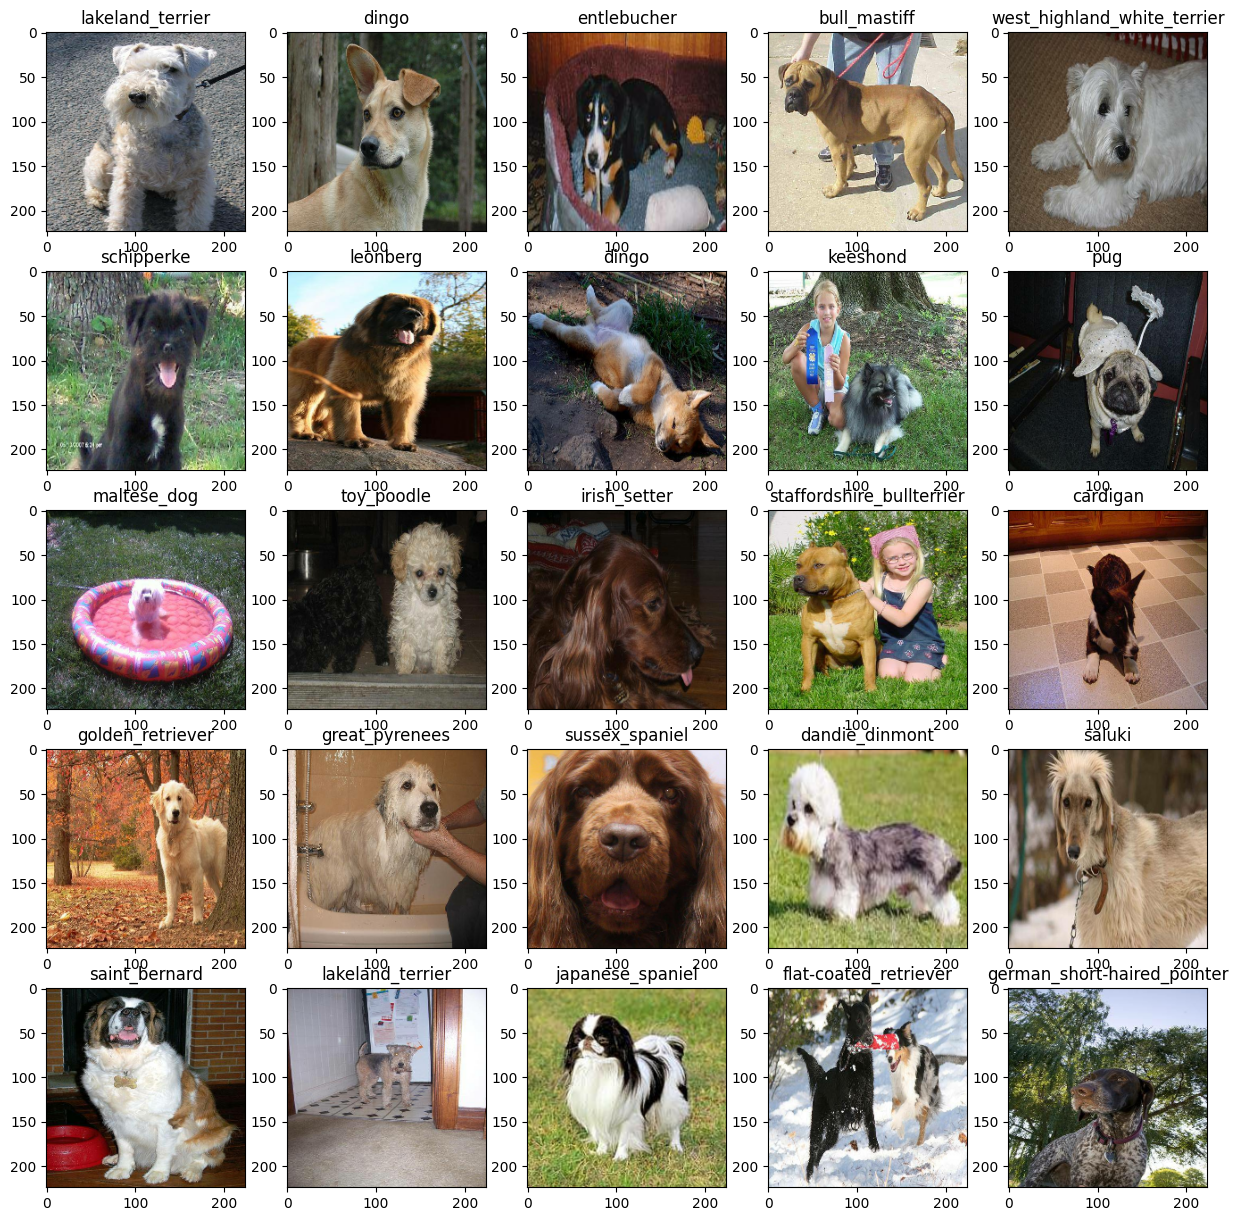

In [ ]:
train_images, train_labels = next (train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

till here we achieved to convert our data into batches of  tensors(image, label)

#building the model


before we build the model, few things needs to be defined

- the input shape( image in form of tensors)
- output shape( image labels in the form tensors)
- the url of model we want to use


In [ ]:
# #input shape

# input_shape = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels
# output_shape = len(unique_breeds)
# model_URL = "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5"


In [ ]:
# NUM_CLASSES = len(unique_breeds)
# NUM_CLASSES


In [ ]:
# def create_model(input_shape=input_shape, output_shape=output_shape, model_url=model_URL):
#   print("Building model with:", model_URL)

#   # model = tf.keras.Sequential([
#   #   hub.KerasLayer(model_URL), # Layer 1 (input layer)
#   #   tf.keras.layers.Dense(units=output_shape,
#   #                         activation="softmax") # Layer 2 (output layer)
#   # ])
#   hubs_layer = hub.KerasLayer(model_URL)
#   model = tf.keras.Sequential([
#       tf.keras.layers.Lambda(lambda x: hubs_layer(x)), # Layer 1 (input layer)
#       tf.keras.layers.Dense(units=output_shape,
#                             activation="softmax") # Layer 2 (output layer)
#       ])

#     # Compile the model
#   model.compile(
#         loss=tf.keras.losses.CategoricalCrossentropy(),
#         optimizer=tf.keras.optimizers.Adam(),
#         metrics=["accuracy"]
#     )

#     # Build the model
#   model.build(input_shape)
#   return model

In [ ]:
# model = create_model()
# model.summary()

So in big picture this is a method which takes the input of image and ek already pretrainded model ('Resnet'} se features nikalta hai and last me output deta hai ki yeh konsa dog breed hai




```
def create_model(input_shape=input_shape,

output_shape=output_shape, model_url=model_URL):
  print("Building model with:", model_URL)


  hubs_layer = hub.KerasLayer(model_URL)

- *this means  ki url seh trainded model uthao and usko ek layer ki tarah treat karo*

  model = tf.keras.Sequential([ *- this means ki layer squential chalengi*

      tf.keras.layers.Lambda(lambda x: hubs_layer(x)), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=output_shape,
                            activation="softmax") # Layer 2 (output layer)-
                             *dense layer decides the final answer*
      ])

```





resnet is already trained on millions of data - this apporach is called transfer learning





```
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


model.compile()- model ko training ke rules deta hai

osme loss batati hai ki model apni prediction me kitni galti kar raha hai

categoricalcrossentroup use hota hai jo har class ke liye pobability de deta hai for eg-

Labrador: 0.70  
Pug: 0.20  
Husky: 0.10


adam optimizerr hai jo fast choices ko adjust krta hai or metrics is like a judge jo judge krega output ko on the basis of given argument which here is accuracy


```




If we were on a project where we would have to select between 2 outcomes then we would be using  

loss = binarycrossentroup()


and dense layer ke activation me sigmoid use hota...

# making call back function

call backs are the helper function which can be used during training a model to save and check it's progress or the model stops training early


creating 2 callbacks one tensorboard which helps to track the progress and other to avoid early stopping of training the model

## Tensorbaord callback

to make tensorboard callback
we need 3 things-
- load tensorboard extension
- create tensorboard callback which saves logs to a directory and pas it to fit() of the model
- visiualize logs using tensorboard magic function

In [ ]:
import datetime
def create_tensorboard():
  logdir = os.path.join("drive/MyDrive/Dog-vision/logs",
                        #log stores whenever we run the experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## early stoping callback

helps our model from overfitting by stopping the training if a certain evaluation has stop improving

In [ ]:

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
#                                                   patience=3)


In [ ]:
# #traing our model - only on 1000 images (subset of data)
# NUM_EPOCS = 100 #@param{type : "slider", min : 10, max: 100, step:10}

In [ ]:
# print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")


In [ ]:
# from sklearn.utils import validation
# from sklearn.utils.validation import validate_data
# def train_model():
#   model = create_model()
#   tensorboard= create_tensorboard()
#   model.fit(x = train_data,
#             epochs = 2,
#             validation_data = val_data,
#             validation_freq = 1,
#             callbacks = [tensorboard, early_stopping]
#             )
#   return model


In [ ]:
# model = train_model()

model started over fiiting - as it is performing so better on training set than validation set

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model(
#     "/content/drive/MyDrive/Dog-vision/dog_model.keras",
#     safe_mode=False
# )


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir /content/drive/MyDrive/Dog-vision/logs

# Making prediction and evaluation

In [ ]:
# val_data

In [ ]:
# predictions = model.predict(val_data, verbose =1)


In [ ]:
# predictions

In [ ]:
# # First prediction
# index = 42
# print(predictions[index])
# print(f"Max value (probability of prediction): {np.max(predictions[index])}")
# print(f"Sum: {np.sum(predictions[index])}")
# print(f"Max index: {np.argmax(predictions[index])}")
# print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


In [ ]:
# #turning probabilities to their respective labels

def get_pred_labels(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

# pred_label = get_pred_labels(predictions[29])
# pred_label

In [ ]:
# #function to unbatch a batch dataset
# image_ =[]
# label_ = []

# for image, label  in val_data.unbatch().as_numpy_iterator():
#  image_.append(image)
#  label_.append(label)

In [ ]:
# # creating a function to unbatch

# def unbatchify(data):
#   #takes input as tensor(image, label) and return images and labels
#   images_list = []
#   labels_list = []
#   for image_item, label_item in data.unbatch().as_numpy_iterator():
#     images_list.append(image_item)
#     labels_list.append(unique_breeds[np.argmax(label_item)]) # Use label_item and get the breed name
#   return images_list, labels_list

In [ ]:
# val_images, val_labels = unbatchify(val_data)
# val_images[0], val_labels[0]

In [ ]:
# def plot_pred(prediction_probabilities,labels,images, n=1):
#    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

#   # Get the pred label
#    pred_label = get_pred_labels(pred_prob) # Corrected function call

#   # Plot image & remove ticks
#    plt.imshow(image)
#    plt.xticks([])
#    plt.yticks([])

#   # Change the colour of the title depending on if the prediction is right or wrong
#    if pred_label == true_label:
#      color = "green"
#    else:
#      color = "red"

#   # Change plot title to be predicted, probability of prediction and truth label
#    plt.title("{} {:2.0f}% {}".format(pred_label,
#                                     np.max(pred_prob)*100,
#                                     true_label),
#                                     color=color)

In [ ]:
# plot_pred(prediction_probabilities=predictions,
#           labels=val_labels,
#           images=val_images,
#           n=77
#           )

creating function to see the top 10 predictions

In [ ]:
# def plot_pred_conf(prediction_probabilities, labels, n=1):
#   """
#   Plus the top 10 highest prediction confidences along with the truth label for sample n.
#   """
#   pred_prob, true_label = prediction_probabilities[n], labels[n]

#   # Get the predicted label
#   pred_label = get_pred_labels(pred_prob)

#   # Find the top 10 prediction confidence indexes
#   top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
#   # Find the top 10 prediction confidence values
#   top_10_pred_values = pred_prob[top_10_pred_indexes]
#   # Find the top 10 prediction labels
#   top_10_pred_labels = unique_breeds[top_10_pred_indexes]

#   # Setup plot
#   top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
#                      top_10_pred_values,
#                      color="grey")
#   plt.xticks(np.arange(len(top_10_pred_labels)),
#              labels=top_10_pred_labels,
#              rotation="vertical")

#   # Change color of true label
#   if np.isin(true_label, top_10_pred_labels):
#     top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
#   else:
#     pass

In [ ]:
# plot_pred_conf(prediction_probabilities=predictions,
#                labels=val_labels,
#                n=9)

In [ ]:

# # Let's check out a few predictions and their different values
# i_multiplier = 20
# num_rows = 3
# num_cols = 2
# num_images = num_rows*num_cols
# plt.figure(figsize=(10*num_cols, 5*num_rows))
# for i in range(num_images):
#   plt.subplot(num_rows, 2*num_cols, 2*i+1)
#   plot_pred(prediction_probabilities=predictions,
#             labels=val_labels,
#             images=val_images,
#             n=i+i_multiplier)
#   plt.subplot(num_rows, 2*num_cols, 2*i+2)
#   plot_pred_conf(prediction_probabilities=predictions,
#                  labels=val_labels,
#                  n=i+i_multiplier)
# plt.tight_layout(h_pad=1.0)
# plt.show()


In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog-vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".keras" # Change save format to .keras
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  # Adjust custom_objects as HubLayerWrapper is no longer needed
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# # Save our model trained on 1000 images
# save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# loaded_1000_image_model = tf.keras.models.load_model(
#     "/content/drive/MyDrive/Dog-vision/models/20260128-16341769618068-1000-images-mobilenetv2-Adam.keras",
#     custom_objects={"KerasLayer": hub.KerasLayer},
#     safe_mode=False
# )


In [ ]:
# model.evaluate(val_data)

In [ ]:
# loaded_1000_image_model.evaluate(val_data)

In [ ]:
# Define model parameters
IMG_SIZE = 224
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
OUTPUT_SHAPE = len(unique_breeds)  # Ensure unique_breeds is defined
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

# Custom wrapper layer
class HubLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, model_url, input_shape=None, trainable=False, **kwargs):
        super(HubLayerWrapper, self).__init__(**kwargs)
        self.model_url = model_url
        self.input_shape_arg = input_shape  # Avoid conflict with Layer's input_shape
        self.trainable = trainable
        # Delay the creation of hub_layer until build time
        self.hub_layer = None

    def build(self, input_shape):
        # Initialize hub_layer during build
        self.hub_layer = hub.KerasLayer(self.model_url, input_shape=self.input_shape_arg, trainable=self.trainable)
        super(HubLayerWrapper, self).build(input_shape)

    def call(self, inputs):
        return self.hub_layer(inputs)

    def get_config(self):
        config = super(HubLayerWrapper, self).get_config()
        config.update(
            {
                'model_url': self.model_url,
                'input_shape': self.input_shape_arg,
                'trainable': self.trainable,
            }
        )
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Define our model now
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)

    # Wrap the hub_layer in the custom layer
    wrapped_hub_layer = HubLayerWrapper(model_url=model_url, input_shape=input_shape, trainable=False)

    # Build the model
    model = tf.keras.Sequential(
        [tf.keras.Input(shape=input_shape), wrapped_hub_layer, tf.keras.layers.Dense(units=output_shape, activation="softmax")]
    )

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"],
    )

    return model



# Create and test the model
model = create_model()
model.summary()


# Save our model trained on 1000 images
saved_model_path = save_model(model=model,
          suffix="1000-images-mobilenetv2-AdamOptimizer")


# Load the model with custom objects
Loaded_1000_image_model = tf.keras.models.load_model(
    saved_model_path,
    custom_objects={'HubLayerWrapper': HubLayerWrapper}
)

# Check the model summary
Loaded_1000_image_model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hub_layer_wrapper_2             │ (None, 1280)           │             0 │
│ (HubLayerWrapper)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,720 (600.47 KB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 0 (0.00 B)

Saving model to: drive/MyDrive/Dog-vision/models/20260130-14231769783026-1000-images-mobilenetv2-AdamOptimizer.keras...


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hub_layer_wrapper_2             │ (None, 1280)           │             0 │
│ (HubLayerWrapper)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,162 (1.76 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 307,442 (1.17 MB)

# training on full data


In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# create the data batch with full data
full_data = create_data_batches(X,y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model= create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5


In [ ]:
#creating full model callback

full_model_callback = create_tensorboard()

full_model_earlystopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                            patience = 3)

In [ ]:
full_model.fit(x = full_data,
               epochs = 100,
               callbacks=[full_model_callback, full_model_earlystopping])

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.4900 - loss: 2.3109
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.8830 - loss: 0.4169
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9396 - loss: 0.2526
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.9650 - loss: 0.1735
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9824 - loss: 0.1207
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.9875 - loss: 0.0941
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.9951 - loss: 0.0649
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.9963 - loss: 0.0525
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9977 - loss: 0.0431
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.9989 - loss: 0.0332
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.9992 - loss: 0.0278
Epoch 12/100
320/320 ━━━━━━━━━

In [ ]:
save_model(full_model, suffix = "full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog-vision/models/20260130-16051769789141-full-image-set-mobilenetv2-Adam.keras...


'drive/MyDrive/Dog-vision/models/20260130-16051769789141-full-image-set-mobilenetv2-Adam.keras'

In [ ]:
#loaded_full_model= load_model('drive/MyDrive/Dog-vision/models/20260129-16311769704319-full-image-set-mobilenetv2-Adam.keras')

In [ ]:
#20260129-1631176970431 wala model load kr lena badh me

#making prediction

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

In [ ]:
test_path = "drive/MyDrive/Dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog-vision/test/e646ac89e0832502f9a726c72773cfcc.jpg',
 'drive/MyDrive/Dog-vision/test/e73dc6a8f2d7c941f28c0a5298bc5bdc.jpg',
 'drive/MyDrive/Dog-vision/test/e3a55cc9c91da472abbced51d98d6ff6.jpg',
 'drive/MyDrive/Dog-vision/test/e0f2620cb1ebf648b986c8a09dbd3664.jpg',
 'drive/MyDrive/Dog-vision/test/e09f4ff3f7acee994812650a2fc7edef.jpg',
 'drive/MyDrive/Dog-vision/test/e21d378710d164f126e7d0b380dc7a1a.jpg',
 'drive/MyDrive/Dog-vision/test/e29d2336a8559d96973c874c9c6c17c6.jpg',
 'drive/MyDrive/Dog-vision/test/e4cffb02169d9b46810d50c6b9eae28d.jpg',
 'drive/MyDrive/Dog-vision/test/dd2c0c44f98af0cf223572a1aa189779.jpg',
 'drive/MyDrive/Dog-vision/test/e59d59ffbb65d9eae166d4068af5d9b9.jpg']

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)


Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions = full_model.predict(test_data,
                                             verbose=1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/Dog-vision/preds_array.csv", test_predictions, delimiter=",")
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog-vision/preds_array.csv", delimiter=",")

In [ ]:
test_predictions.shape

(10357, 120)

# preparing data for predictions






In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e646ac89e0832502f9a726c72773cfcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e73dc6a8f2d7c941f28c0a5298bc5bdc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e3a55cc9c91da472abbced51d98d6ff6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f2620cb1ebf648b986c8a09dbd3664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e09f4ff3f7acee994812650a2fc7edef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e646ac89e0832502f9a726c72773cfcc,1.402047e-05,7.229039e-05,4.557211e-05,1.825399e-07,1.222057e-05,4.010808e-04,4.403163e-05,1.315706e-04,1.110980e-05,...,3.647733e-05,6.744582e-05,1.933194e-07,5.464104e-06,9.482611e-07,5.830791e-04,5.834993e-03,7.644658e-03,3.483479e-06,4.102548e-05
1,e73dc6a8f2d7c941f28c0a5298bc5bdc,2.367064e-07,9.776890e-09,2.764393e-08,7.517761e-10,1.426665e-02,2.479665e-04,3.243237e-10,1.145835e-04,2.065793e-07,...,5.511984e-08,2.911256e-06,1.099476e-08,2.243742e-06,9.649514e-05,8.069493e-09,7.450182e-07,8.683913e-01,1.002040e-07,3.676207e-07
2,e3a55cc9c91da472abbced51d98d6ff6,5.517664e-10,2.170151e-08,1.023037e-07,7.807850e-11,1.332012e-13,1.644530e-12,3.668972e-10,5.577422e-11,7.566249e-13,...,4.947455e-10,2.942429e-13,8.835386e-13,1.098033e-12,4.375929e-09,1.119757e-13,4.015819e-11,3.379801e-11,1.433735e-14,1.094450e-10
3,e0f2620cb1ebf648b986c8a09dbd3664,1.358302e-06,2.047649e-07,5.721704e-07,1.276242e-07,9.285154e-05,4.677015e-07,3.945415e-09,7.623582e-07,2.629528e-08,...,8.073503e-10,6.048626e-08,1.263254e-06,4.760377e-05,1.335370e-04,1.151950e-08,1.337762e-08,2.973223e-05,5.188714e-08,2.216823e-09
4,e09f4ff3f7acee994812650a2fc7edef,6.070313e-13,3.360022e-12,1.739627e-07,2.010323e-11,6.241931e-10,8.562106e-11,1.139676e-12,8.614398e-10,9.522923e-11,...,1.957436e-13,2.383839e-09,9.521466e-12,2.101394e-11,4.284821e-09,7.315383e-13,8.870750e-12,8.760124e-10,5.562350e-14,7.350959e-11


In [ ]:
preds_df.to_csv("drive/MyDrive/Dog-vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

In [ ]:
import os
# making predicitons
custom_path = "drive/MyDrive/Dog-vision/dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]


In [ ]:
custom_image_paths

['drive/MyDrive/Dog-vision/dog-photos/dog-photo-1.jpeg',
 'drive/MyDrive/Dog-vision/dog-photos/labradorretriever2.jpeg',
 'drive/MyDrive/Dog-vision/dog-photos/pitbull-dog-with-a-cheerful-face-and-sitting-on-the-grass-photo.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
custom_preds = full_model.predict(custom_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
custom_pred_labels = [get_pred_labels(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever', 'great_dane', 'american_staffordshire_terrier']

In [ ]:
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

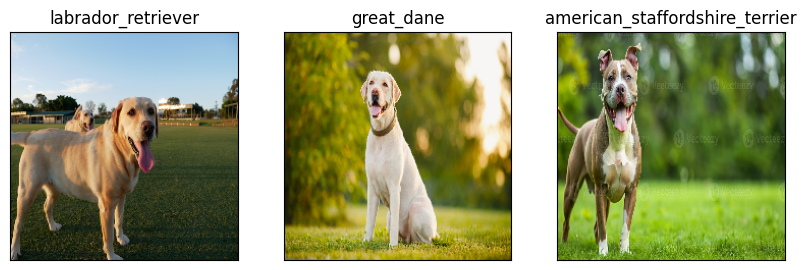

In [ ]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)